In [67]:
import pandas as pd
import os
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
benchmarks_path = Path("./benchmarks")
dfs = []
for algo in benchmarks_path.iterdir():
    for lang in algo.iterdir():
        results_path = (lang / "results.json").absolute()
        if not results_path.exists():
            continue
        df = pd.read_json(results_path)
        df['algorithm'] = algo.name
        df['language'] = lang.name
        dfs.append(df)


In [69]:
df = pd.concat(dfs)
df.to_csv("results.csv", index=False)
df

,input,time,algorithm,language
0,1,0.006334,fibonacci,deno
1,5,0.001875,fibonacci,deno
2,10,0.005167,fibonacci,deno
3,15,0.090125,fibonacci,deno
4,20,0.185000,fibonacci,deno
...,...,...,...,...
31,35,15.140000,fibonacci,c
32,40,168.370000,fibonacci,c
33,45,1839.910000,fibonacci,c
34,46,2962.090000,fibonacci,c


In [70]:
df.groupby(['algorithm', 'language', 'input']).mean()

time
algorithm language input              
fibonacci bun      1          0.006709
                   5          0.000569
                   10         0.016625
                   15         0.059125
                   20         0.123792
...                                ...
          zig      35        45.097833
                   40       431.050402
                   45      4770.978014
                   46      7802.830569
                   47     12744.831125

[123 rows x 1 columns]

In [71]:
pivot_table = pd.pivot_table(df, values='time', index=['algorithm', 'language'], columns=['input'], aggfunc="mean")
pivot_table.sort_values(by=40, ascending=True)
pivot_table.loc[:, pivot_table.columns > 25]

input                      30          35           40           45  \
algorithm language                                                    
fibonacci bun        4.044666   37.173056   405.493736  4500.722611   
          c          1.803333   17.680000   167.580000  1838.396667   
          cpp        1.358458   15.610334   168.350764  1849.894958   
          deno       4.718209   52.444931   586.893306  6344.908791   
          golang     2.577334   25.002347   225.096986  2472.398111   
          java       1.747625   18.207514   199.422236  2225.130042   
          nodejs     4.775028   53.650444   589.977847  6546.687430   
          python    59.942881  671.019077  7377.903620          NaN   
          rust       1.556583   17.493153   174.378208  1906.447459   
          swift      1.854833   20.698361   232.568653  2556.983403   
          zig        5.515931   45.097833   431.050402  4770.978014   

input                        46            47  
algorithm language                             
fibonacci bun               NaN           NaN  
          c         2959.316667   4797.343333  
          cpp       2983.829847   4900.294458  
          deno              NaN           NaN  
          golang    4032.686319   6479.313861  
          java      3539.274556   5738.901444  
          nodejs            NaN           NaN  
          python            NaN           NaN  
          rust      3084.634652   5000.345250  
          swift     4103.616139   6651.461472  
          zig       7802.830569  12744.831125

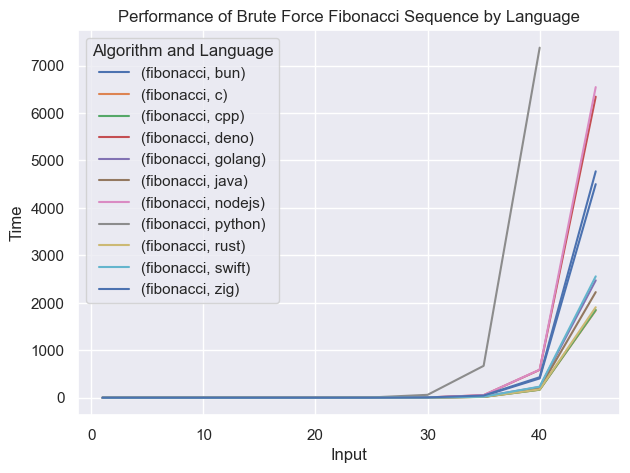

In [72]:
sns.set_theme(style="darkgrid")
# filter out column > 45
pivot_table2 = pivot_table.loc[:, pivot_table.columns <= 45]
pivot_table2.T.plot(kind='line', figsize=(10, 6))
plt.xlabel('Input')
plt.ylabel('Time')
plt.title('Performance of Brute Force Fibonacci Sequence by Language')
plt.legend(title='Algorithm and Language')
plt.gcf().set_size_inches(7, 5)
plt.grid(True)
plt.show()

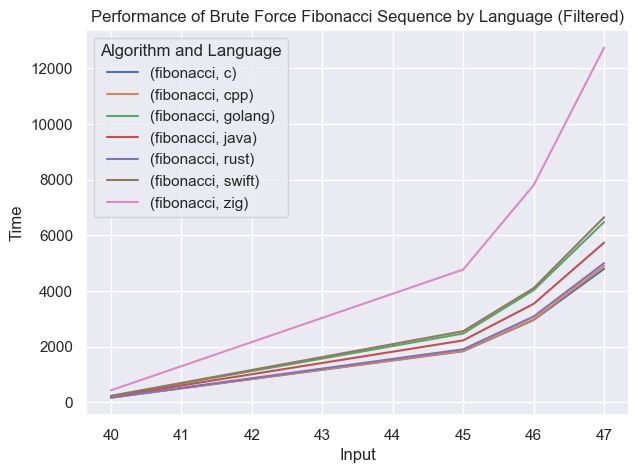

In [73]:
# Remove rows where language is python, deno, or nodejs
filtered_df = df[~df['language'].isin(['python', 'deno', 'nodejs', 'bun'])]

# Create a new pivot table with the filtered data
filtered_pivot_table = pd.pivot_table(filtered_df, values='time', index=['algorithm', 'language'], columns=['input'], aggfunc="mean")
filtered_pivot_table = filtered_pivot_table.loc[:, filtered_pivot_table.columns >= 38]
filtered_pivot_table.sort_values(by=40, ascending=True)

# Plot the filtered pivot table
sns.set_theme(style="darkgrid")
filtered_pivot_table.T.plot(kind='line', figsize=(10, 6))
plt.xlabel('Input')
plt.ylabel('Time')
plt.title('Performance of Brute Force Fibonacci Sequence by Language (Filtered)')
plt.legend(title='Algorithm and Language')
plt.gcf().set_size_inches(7, 5)
plt.grid(True)
plt.show()